In [ ]:
pip install bambi

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import arviz as az
import bambi as bmb
from IPython.core.pylabtools import figsize

figsize(10, 10)
sns.set_theme()

df = pd.read_csv("student-score.csv")

In [8]:
mat, por = df['mat'].values, df['por'].values 

$$y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n + \epsilon$$
$$Y= \beta^{T}X + \epsilon$$

$$ G_2 = mG_1 + b$$

In [9]:
from sklearn.linear_model import LinearRegression 

linear_model = LinearRegression().fit(mat.reshape(-1, 1), por)
predict_line = linear_model.predict(mat.reshape(-1, 1))

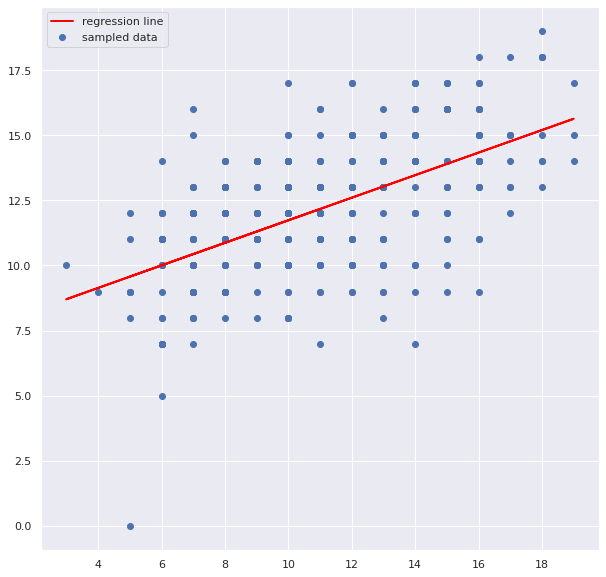

In [10]:
plt.scatter(mat, por, label="sampled data")
plt.plot(mat, predict_line, label="regression line", lw=2.0, color="red")
plt.legend(loc=0)

In [11]:
gauss_model = bmb.Model('por ~ mat', data=df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [por_sigma, Intercept, mat]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'mat'}>,
        <AxesSubplot:title={'center':'mat'}>],
       [<AxesSubplot:title={'center':'por_sigma'}>,
        <AxesSubplot:title={'center':'por_sigma'}>]], dtype=object)

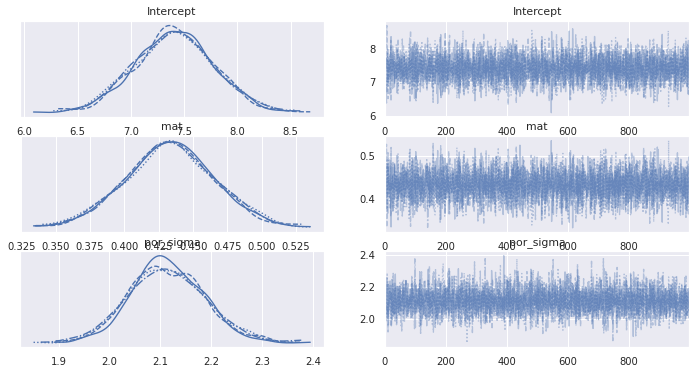

In [12]:
# Fit the model using 1000 on each of 4 chains
gauss_fitted = gauss_model.fit(draws=1000, chains=4)
gauss_model.predict(gauss_fitted, kind="pps", draws=1000)


# Use ArviZ to plot the results
az.plot_trace(gauss_fitted)

<AxesSubplot:xlabel='por / por'>

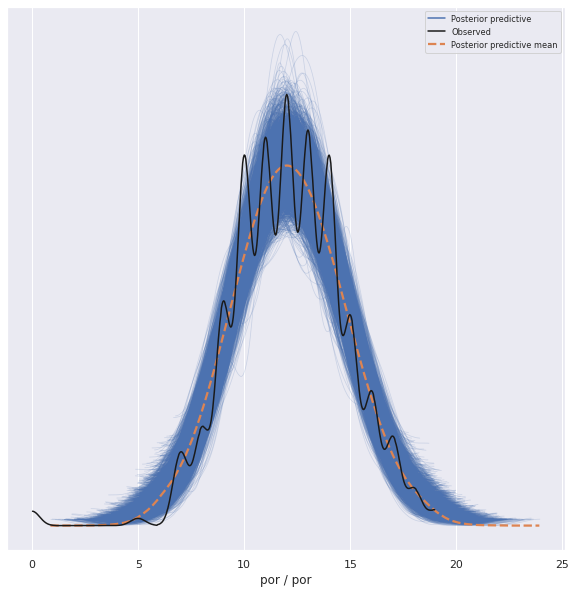

In [13]:
az.plot_ppc(gauss_fitted)

In [17]:
def plot_sample_prediction(mat, por, fitted):

    # Plot Data
    plt.scatter(mat, por, label="data")

    x_range = np.linspace(min(mat), max(mat), 2000)

    y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()

    # Plot mean prediction    
#     plt.plot(x_range, y_pred,
#             color="black",
#             label="Mean regression line"
#             )

    # Plot sample predictions
    for i in range(10):
        y_pred = fitted.posterior.mat.values[0, i] * x_range + fitted.posterior.Intercept.values[0, i]
        plt.plot(x_range, y_pred,
            color="green",linestyle="--",
            label="Mean regression line"
            )



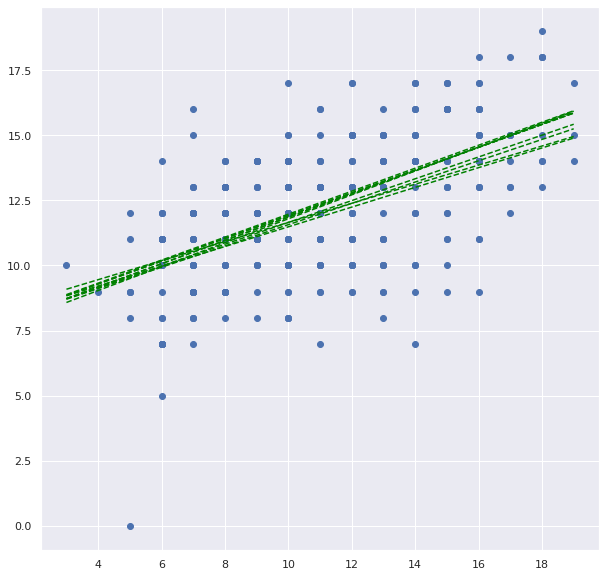

In [18]:
plot_sample_prediction(mat, por, gauss_fitted)

In [194]:
def plot_interval_prediction(mat, por, fitted, plot_sklearn_regression=False):
    # Plot Data
    plt.scatter(mat, por, label="data")

    # Plot sklearn Predictions
    if plot_sklearn_regression:
        plt.plot(mat, predict_line, label="regression line", lw=2.0, color="blue")

    # Plot recovered linear regression
    x_range = np.linspace(min(mat), max(mat), 2000)
    y_pred = fitted.posterior.mat.values.mean() * x_range + fitted.posterior.Intercept.values.mean()
    
    plt.plot(x_range, y_pred,
            color="black",
            label="Mean regression line"
            )
            
    # Plot HDIs
    for interval in [0.38, 0.68]:
        az.plot_hdi(mat, fitted.posterior_predictive.por,
                    hdi_prob=interval, color="firebrick")

    plt.legend(loc=0);



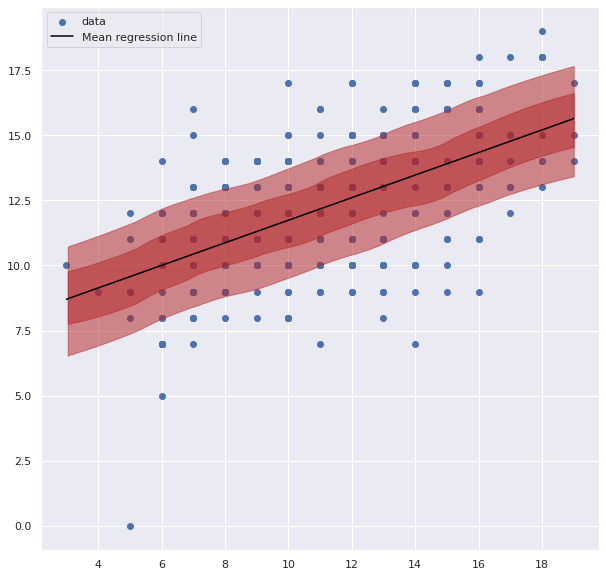

In [195]:
plot_interval_prediction(mat, por, gauss_fitted)

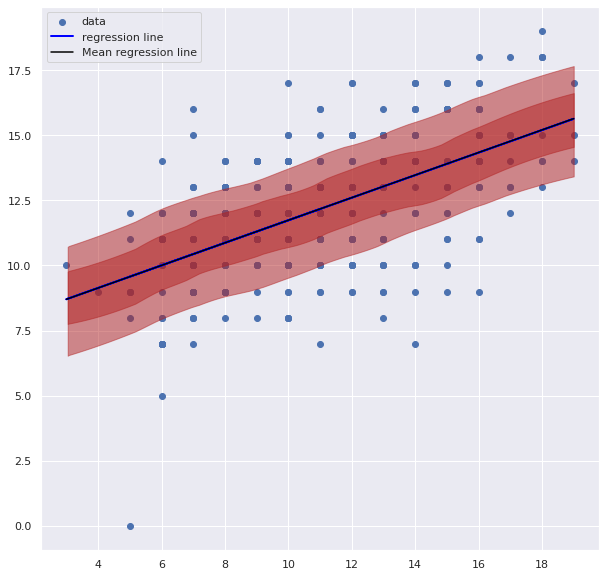

In [196]:
plot_prediction(mat, por, gauss_fitted, plot_sklearn_regression=True)